In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt

In [2]:
def percentage(part, whole):
    return (float(part) / float(whole))*100

In [11]:
consumerKey ="2O2G3Pvyx9NSiOzs71d4YnWef"
consumerSecret ="ecECM8PQUBwnKQqbdfyMEa37u1jplCpAo1xW2KqEk9X9o0GIHT"
accessToken ="300161933-cXMvK3oxn7xk3Vs9Kbqg3CCkGBAni1DaJc8ckqbb"
accessTokenSecret ="ssyzYCwh4b61p3L3XYscA0ydRhrSH7h0sU3AoLbxFSqpk"

auth =tweepy.OAuthHandler(consumer_key = consumerKey, consumer_secret=consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [12]:
auth =tweepy.OAuthHandler(consumer_key = consumerKey, consumer_secret=consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [13]:
searchTerm = input('Enter keyword / hashtag to search : ')
noOfSearchTerm = int(input('Enter how many tweet to analyze : '))

Enter keyword / hashtag to search : kejriwal
Enter how many tweet to analyze : 1000


In [14]:
tweets = tweepy.Cursor(api.search, q=searchTerm).items(noOfSearchTerm)

In [15]:
positive = 0
negative = 0
neutral = 0
polarity = 0

In [16]:
# for printing tweets
#for tweet in tweets:
 #   print(tweet.text)
  #  analysis = TextBlob(tweet.text)

In [17]:
# for printing tweets

for tweet in tweets:
    # print(tweet.text)
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    if (analysis.sentiment.polarity == 0):
        neutral +=1
    if (analysis.sentiment.polarity < 0.00):
        negative +=1
    if (analysis.sentiment.polarity > 0.00):
        positive +=1

In [18]:
positive = percentage(positive, noOfSearchTerm)
negative = percentage(negative, noOfSearchTerm)
neutral = percentage(neutral, noOfSearchTerm)
polarity = percentage(polarity, noOfSearchTerm)

In [19]:
positive = format(positive, '.2f')
neutral = format(neutral, '.2f')
negative = format(negative, '.2f')

In [20]:
print("Peoples re-action on "+ searchTerm + " by analyze " + str(noOfSearchTerm) + " tweets")

Peoples re-action on kejriwal by analyze 1000 tweets


In [21]:
if (polarity == 0):
    print("Neutral")
elif (polarity < 0.00):
    print("Negative")
elif (polarity > 0.00):
    print("Positive")

Positive


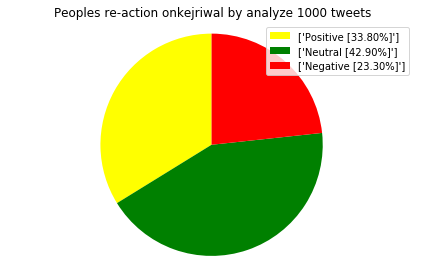

In [22]:
labels = ['Positive ['+str(positive)+'%]'],['Neutral ['+str(neutral)+'%]'],['Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellow', 'green', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc = 'best')
plt.title('Peoples re-action on' + searchTerm + ' by analyze ' + str(noOfSearchTerm) + ' tweets')
plt.axis('equal')
plt.tight_layout()
plt.show()